In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r"D:\JAIMIN\Data Science\Machine Learning\winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.duplicated().sum()

240

In [6]:
df.drop_duplicates(subset=None, keep='first',inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

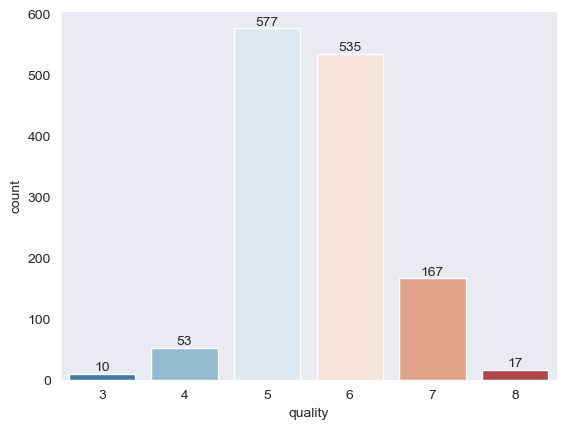

In [13]:
sns.set_style('dark')
ax = sns.countplot(x = 'quality', data=df, palette = 'RdBu_r')
for bars in ax.containers: 
    ax.bar_label(bars)

In [14]:
df['quality'].value_counts() # Conclusion: Imbalance Dataset

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

<Axes: >

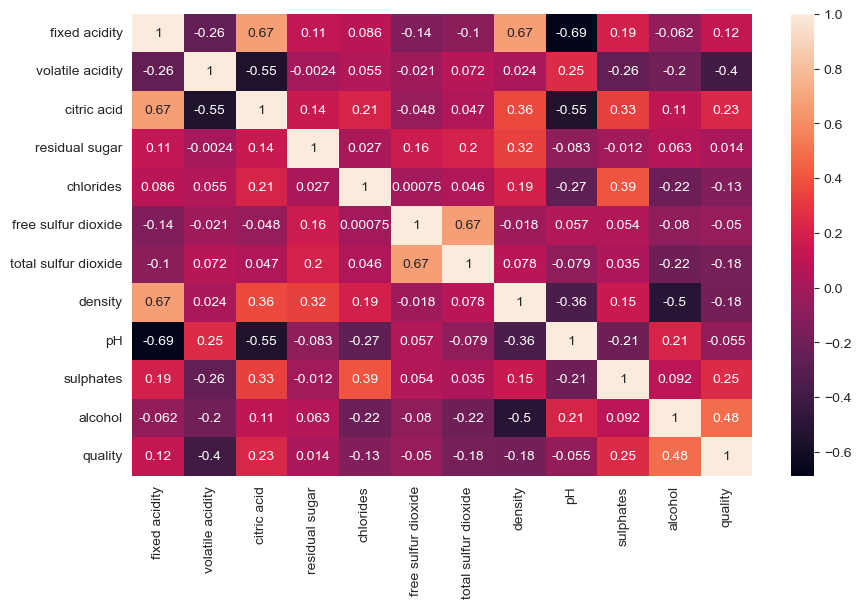

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='quality'>

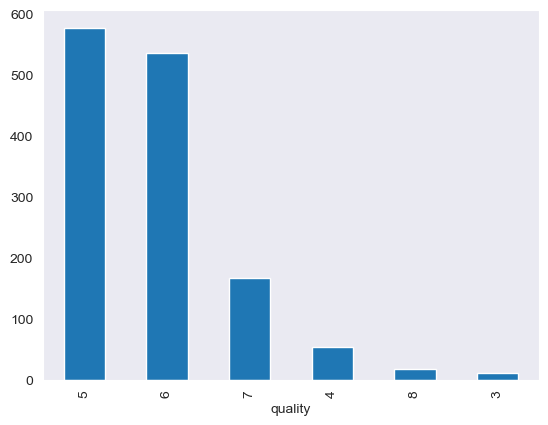

In [16]:
# to Plot Bar Char for Quality Counts
df.quality.value_counts().plot(kind='bar')

<Axes: xlabel='fixed acidity', ylabel='Count'>

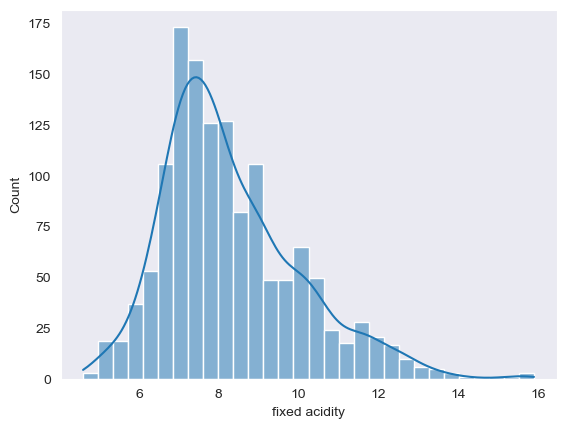

In [17]:
# To Plot Histogram Chart for Fixed Acidity
sns.histplot(df['fixed acidity'], kde = True)

D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


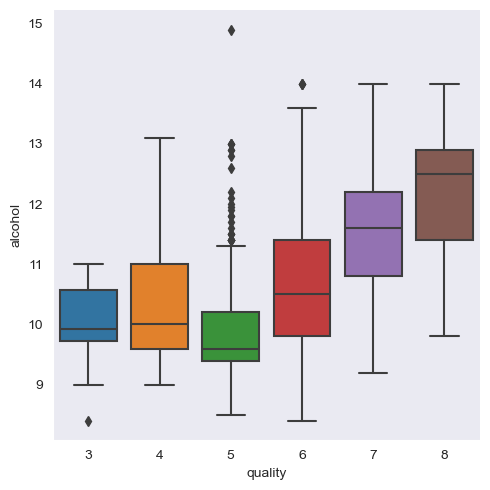

In [18]:
# Categorical Plot
sns.catplot(x='quality', y = 'alcohol', data=df, kind = 'box')

<Axes: xlabel='alcohol', ylabel='pH'>

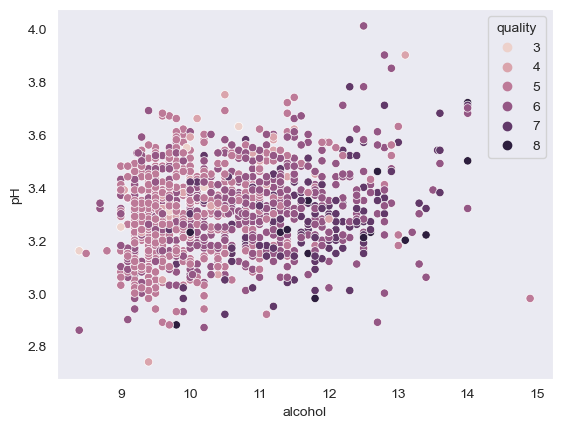

In [19]:
#Scatterplot
sns.scatterplot(x='alcohol', y = 'pH', hue = 'quality', data=df)

<Axes: >

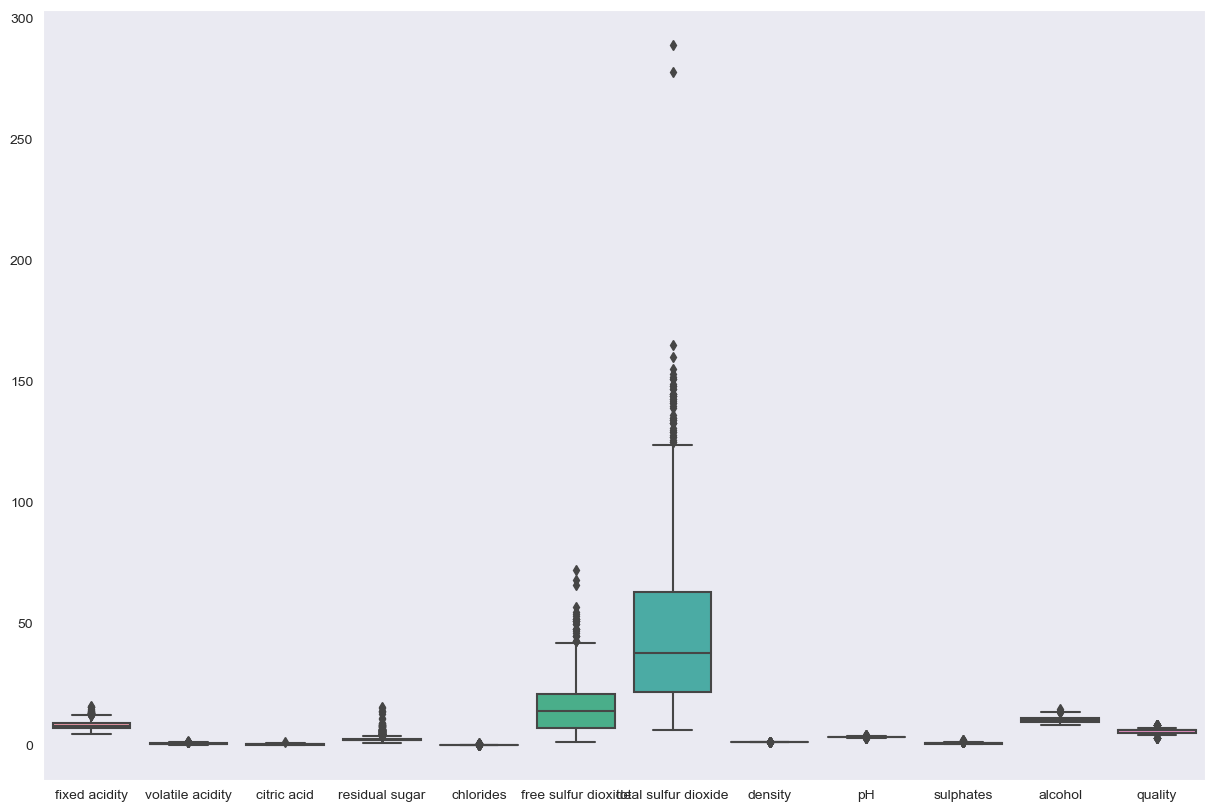

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [21]:
df['quality']=df['quality'].apply(lambda x: 1 if x > 6.5 else 0) # x > 6.5 - good = value 1, if x < 6.5 - bad - value 0

In [22]:
x = df.drop('quality', axis = 1)
print(x)
y = df['quality']
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [23]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import SMOTE
smote  = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)

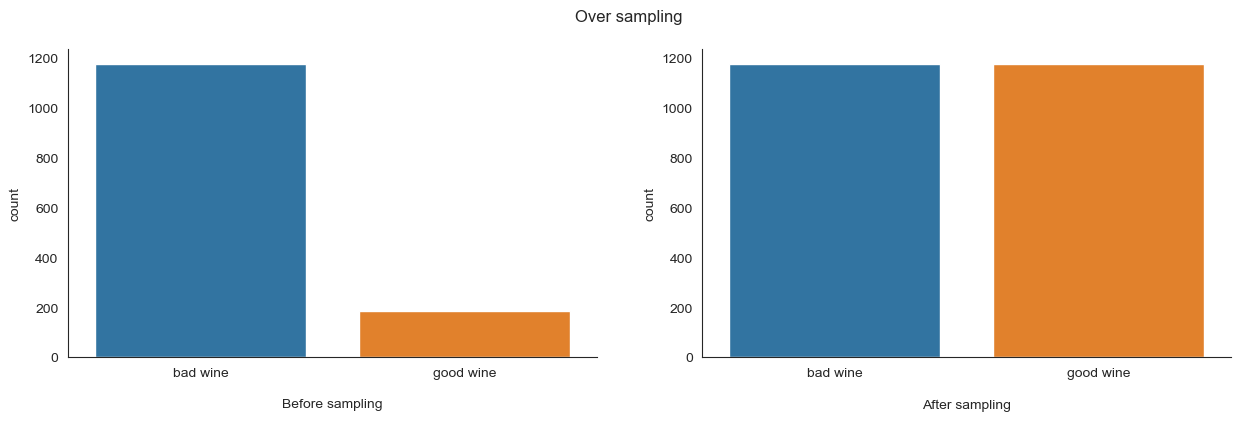

In [27]:
import seaborn as sns
sns.set_style("white")
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(data=df, x = 'quality')
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nBefore sampling")

plt.subplot(1,2,2)
sns.countplot(x=y_smote)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nAfter sampling")

plt.suptitle('Over sampling \n\n\n')

sns.despine()

D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


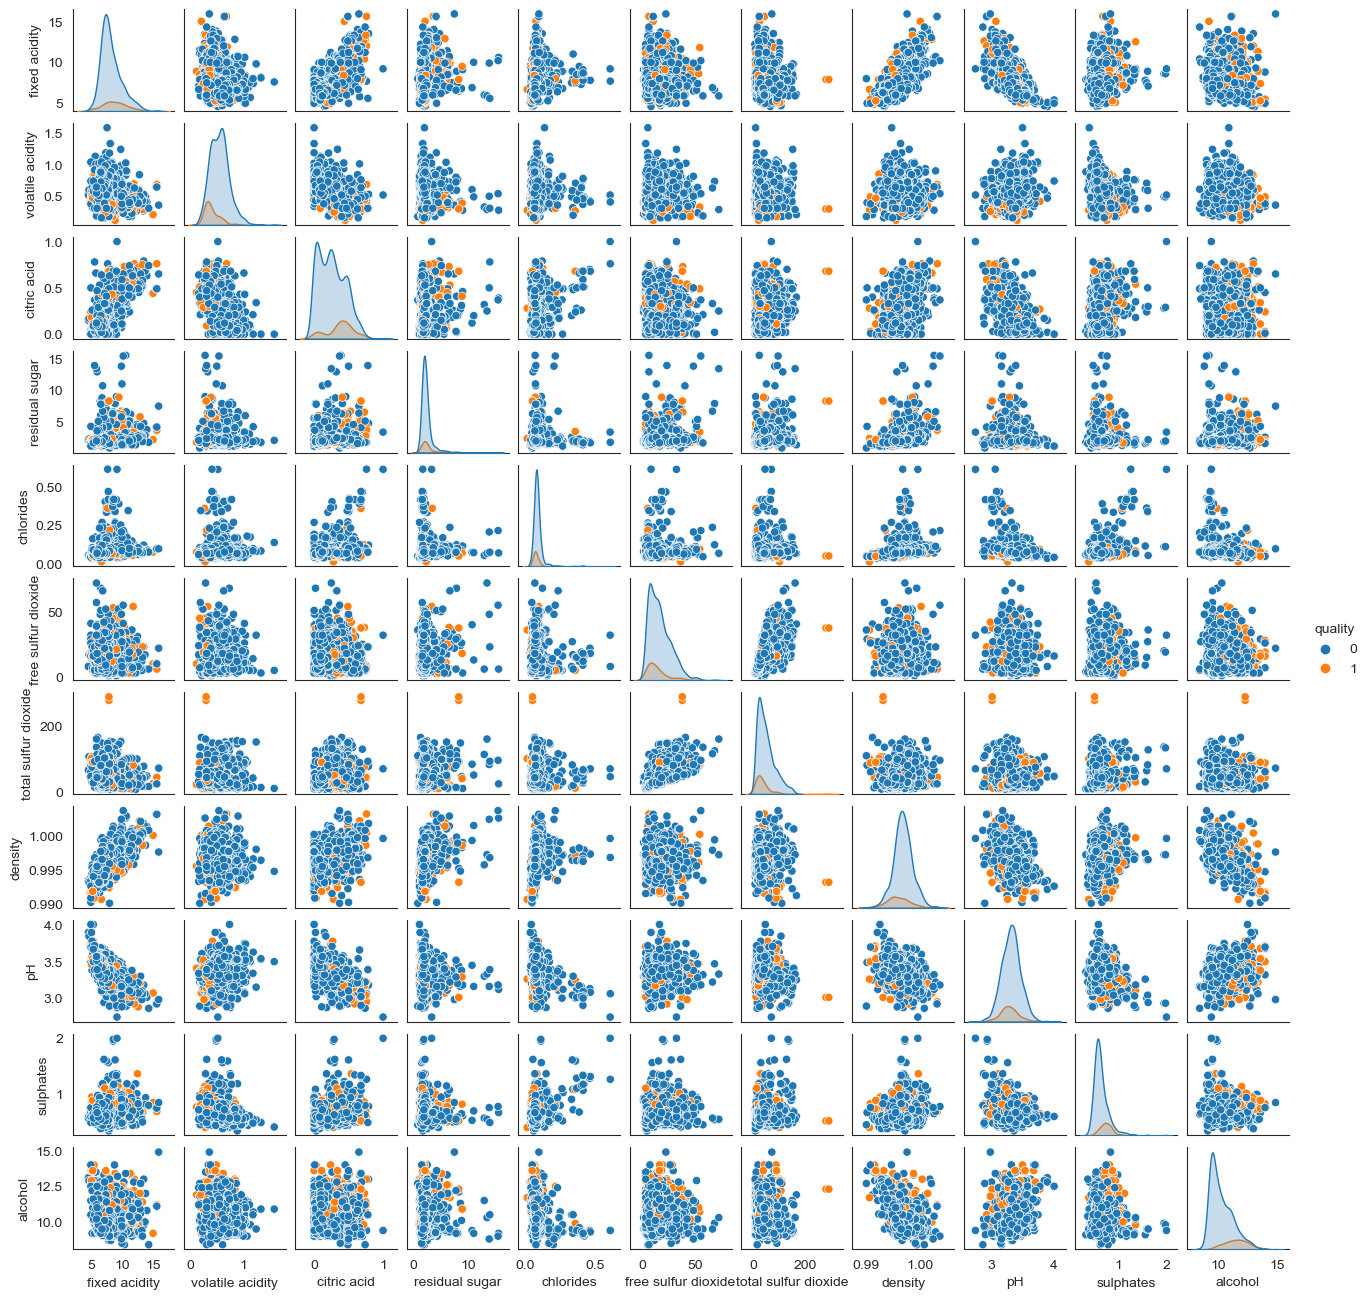

In [28]:
sns.pairplot(df, hue = 'quality', size=1.2, diag_kind = 'kde')
plt.show()

<Axes: xlabel='quality', ylabel='sulphates'>

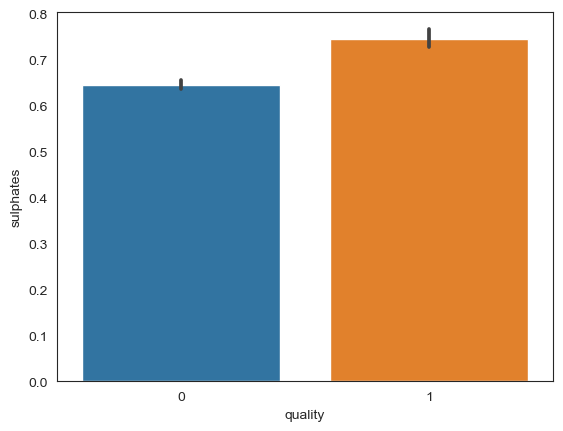

In [29]:
#quality vs sulphates
sns.barplot(x='quality', y = 'sulphates', data=df)

<Axes: xlabel='quality', ylabel='alcohol'>

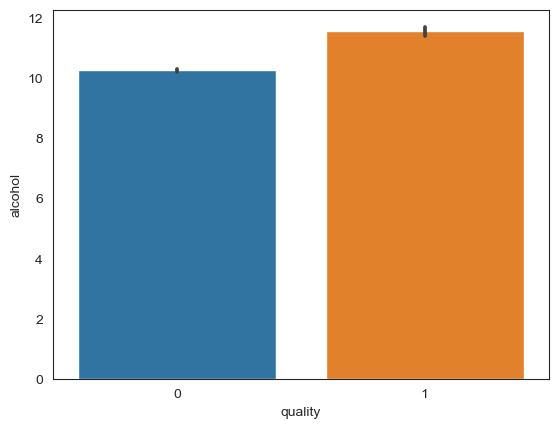

In [30]:
sns.barplot(x='quality', y = 'alcohol', data=df)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [33]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
311,7.9,0.53,0.24,2.0,0.072,15.0,105.0,0.99600,3.27,0.54,9.4
943,9.8,0.50,0.34,2.3,0.094,10.0,45.0,0.99864,3.24,0.60,9.7
1472,7.6,0.35,0.60,2.6,0.073,23.0,44.0,0.99656,3.38,0.79,11.1
1048,9.3,0.49,0.36,1.7,0.081,3.0,14.0,0.99702,3.27,0.78,10.9
1388,6.6,0.64,0.31,6.1,0.083,7.0,49.0,0.99718,3.35,0.68,10.3
...,...,...,...,...,...,...,...,...,...,...,...
664,12.1,0.40,0.52,2.0,0.092,15.0,54.0,1.00000,3.03,0.66,10.2
1142,6.9,0.45,0.11,2.4,0.043,6.0,12.0,0.99354,3.30,0.65,11.4
81,7.8,0.43,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4
692,8.6,0.49,0.51,2.0,0.422,16.0,62.0,0.99790,3.03,1.17,9.0


In [34]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1449,7.2,0.38,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3
628,8.7,0.54,0.26,2.5,0.097,7.0,31.0,0.99760,3.27,0.60,9.3
810,7.3,0.49,0.10,2.6,0.068,4.0,14.0,0.99562,3.30,0.47,10.5
160,7.6,0.95,0.03,2.0,0.090,7.0,20.0,0.99590,3.20,0.56,9.6
808,7.4,0.53,0.12,1.9,0.165,4.0,12.0,0.99702,3.26,0.86,9.2
...,...,...,...,...,...,...,...,...,...,...,...
59,7.3,0.39,0.31,2.4,0.074,9.0,46.0,0.99620,3.41,0.54,9.4
1256,7.5,0.59,0.22,1.8,0.082,43.0,60.0,0.99499,3.10,0.42,9.2
878,8.8,0.61,0.19,4.0,0.094,30.0,69.0,0.99787,3.22,0.50,10.0
754,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.1


In [35]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)

SVC()

In [36]:
# Predicition the test set
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
from sklearn.metrics import accuracy_score, classification_report

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

In [39]:
accuracy_score(y_test, y_pred)

0.8578431372549019

In [40]:
classifier.score(x_test, y_test)

0.8578431372549019

In [41]:
classifier.score(x_train, y_train)

0.8696109358569927

In [42]:
from sklearn.metrics import RocCurveDisplay

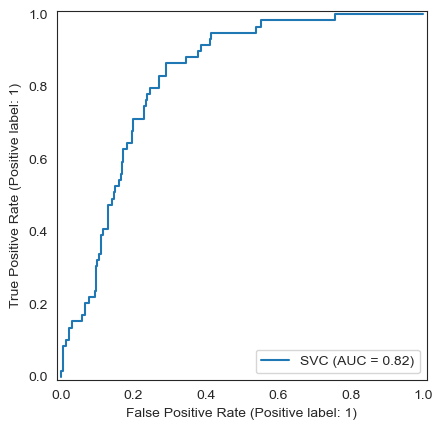

In [43]:
RocCurveDisplay.from_estimator(classifier, x_test, y_test)

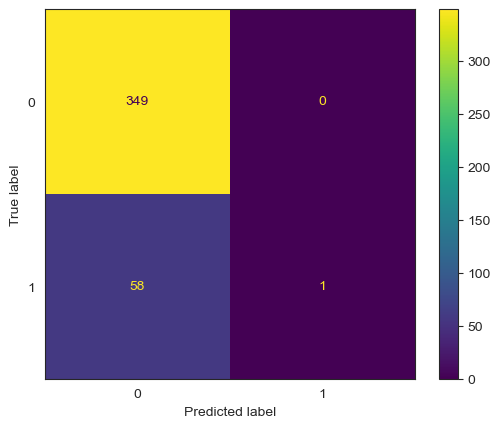

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

In [45]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [46]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.49026834239130435, 0.9642857142857143, 'x[10] <= 11.45\ngini = 0.228\nsamples = 951\nvalue = [826.0, 125.0]'),
 Text(0.16627038043478262, 0.8928571428571429, 'x[1] <= 0.335\ngini = 0.133\nsamples = 782\nvalue = [726, 56]'),
 Text(0.32826936141304347, 0.9285714285714286, 'True  '),
 Text(0.05217391304347826, 0.8214285714285714, 'x[9] <= 0.655\ngini = 0.412\nsamples = 93\nvalue = [66.0, 27.0]'),
 Text(0.017391304347826087, 0.75, 'x[10] <= 11.0\ngini = 0.071\nsamples = 27\nvalue = [26, 1]'),
 Text(0.008695652173913044, 0.6785714285714286, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.02608695652173913, 0.6785714285714286, 'x[8] <= 3.245\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.017391304347826087, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.034782608695652174, 0.6071428571428571, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08695652173913043, 0.75, 'x[5] <= 34.5\ngini = 0.478\nsamples = 66\nvalue = [40, 26]'),
 Text(0.07826086

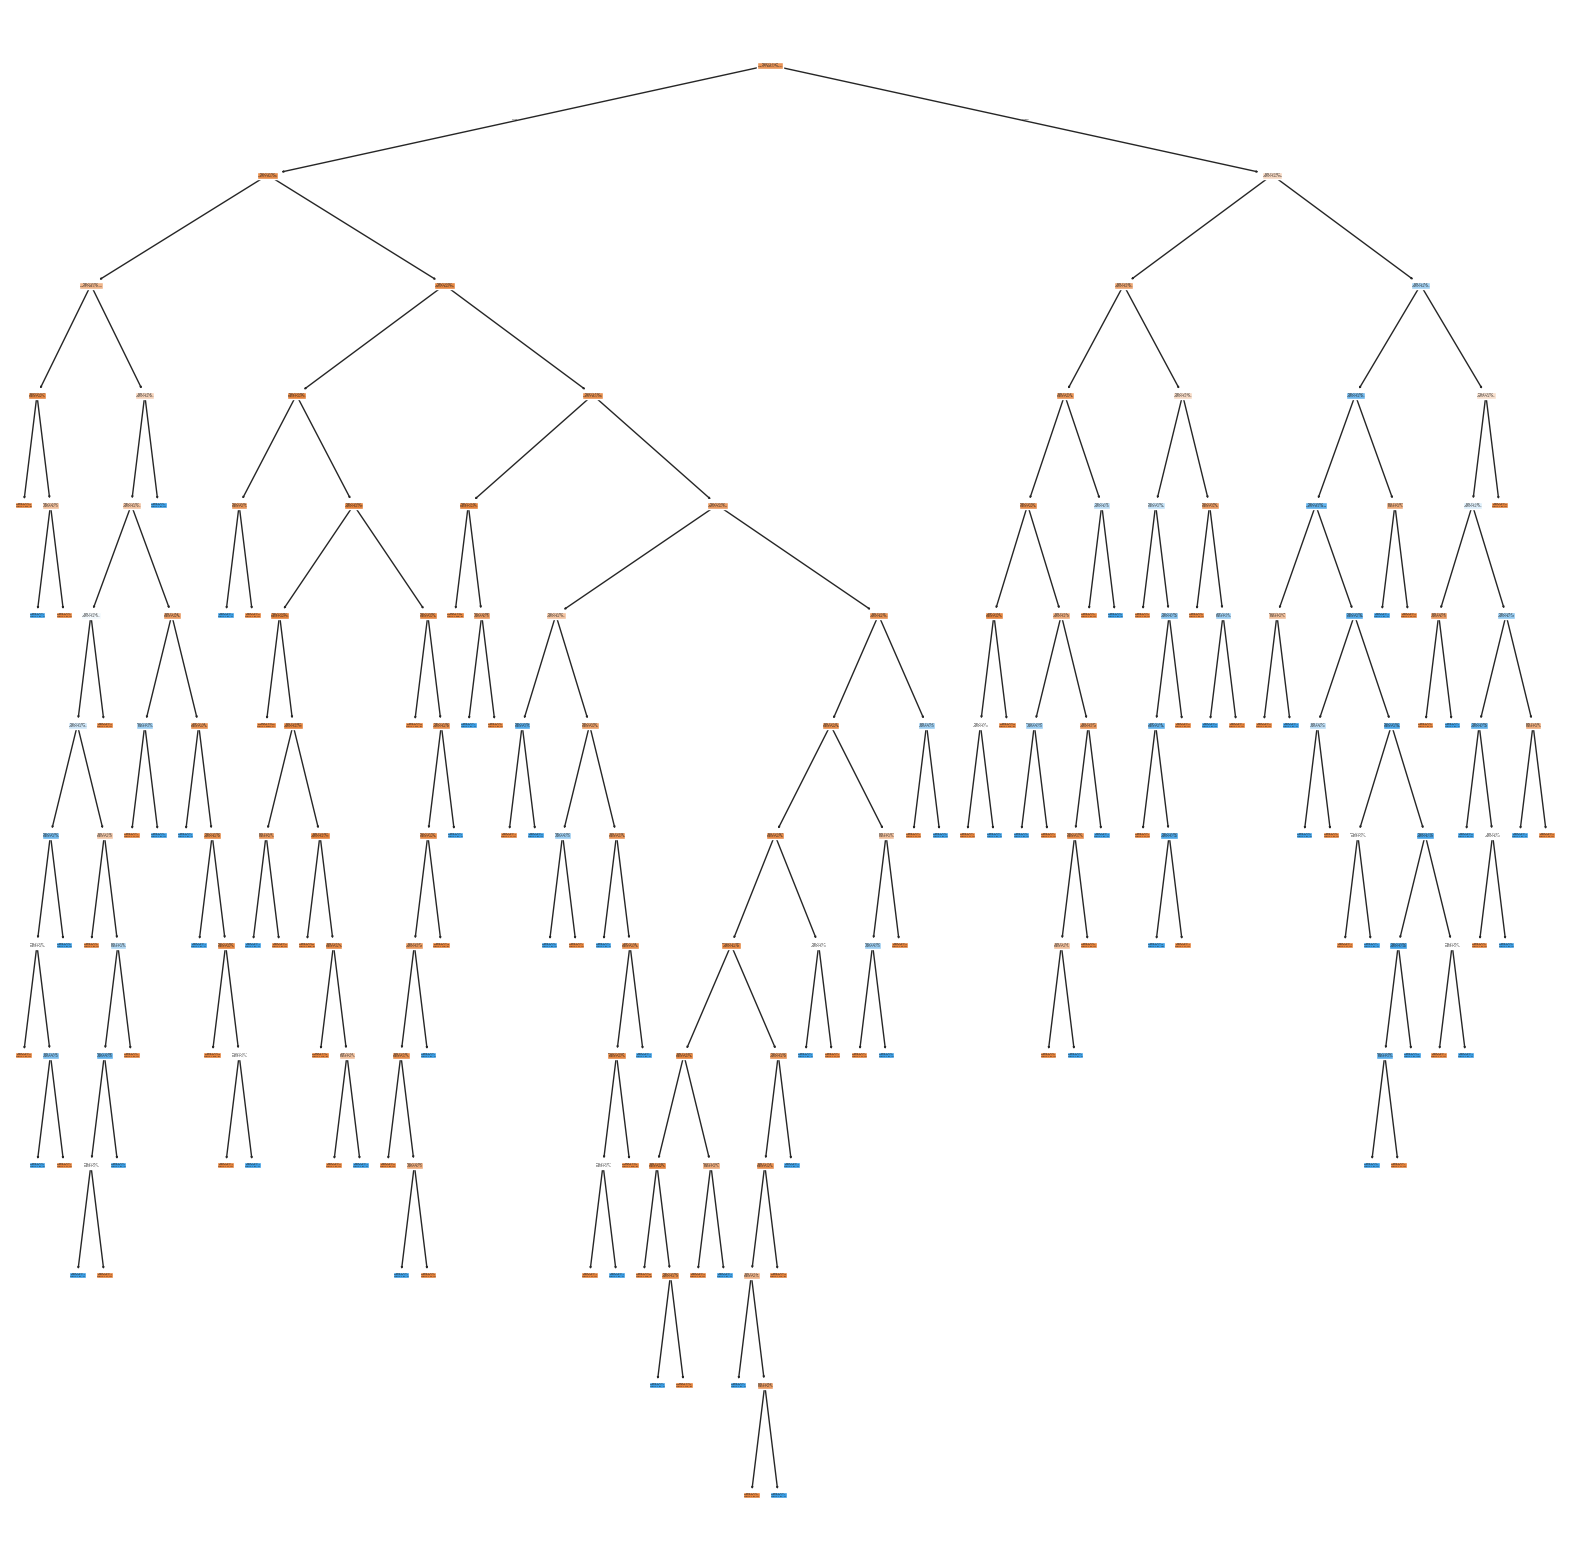

In [47]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

plt.figure(figsize=(20,20))
tree.plot_tree(model,filled=True)

In [48]:
df1 = df.head(500)

In [49]:
x1 = df1.drop(columns='quality')

In [50]:
y1 = df1.quality

In [51]:
model1 = DecisionTreeClassifier()
model1.fit(x1,y1)

DecisionTreeClassifier()

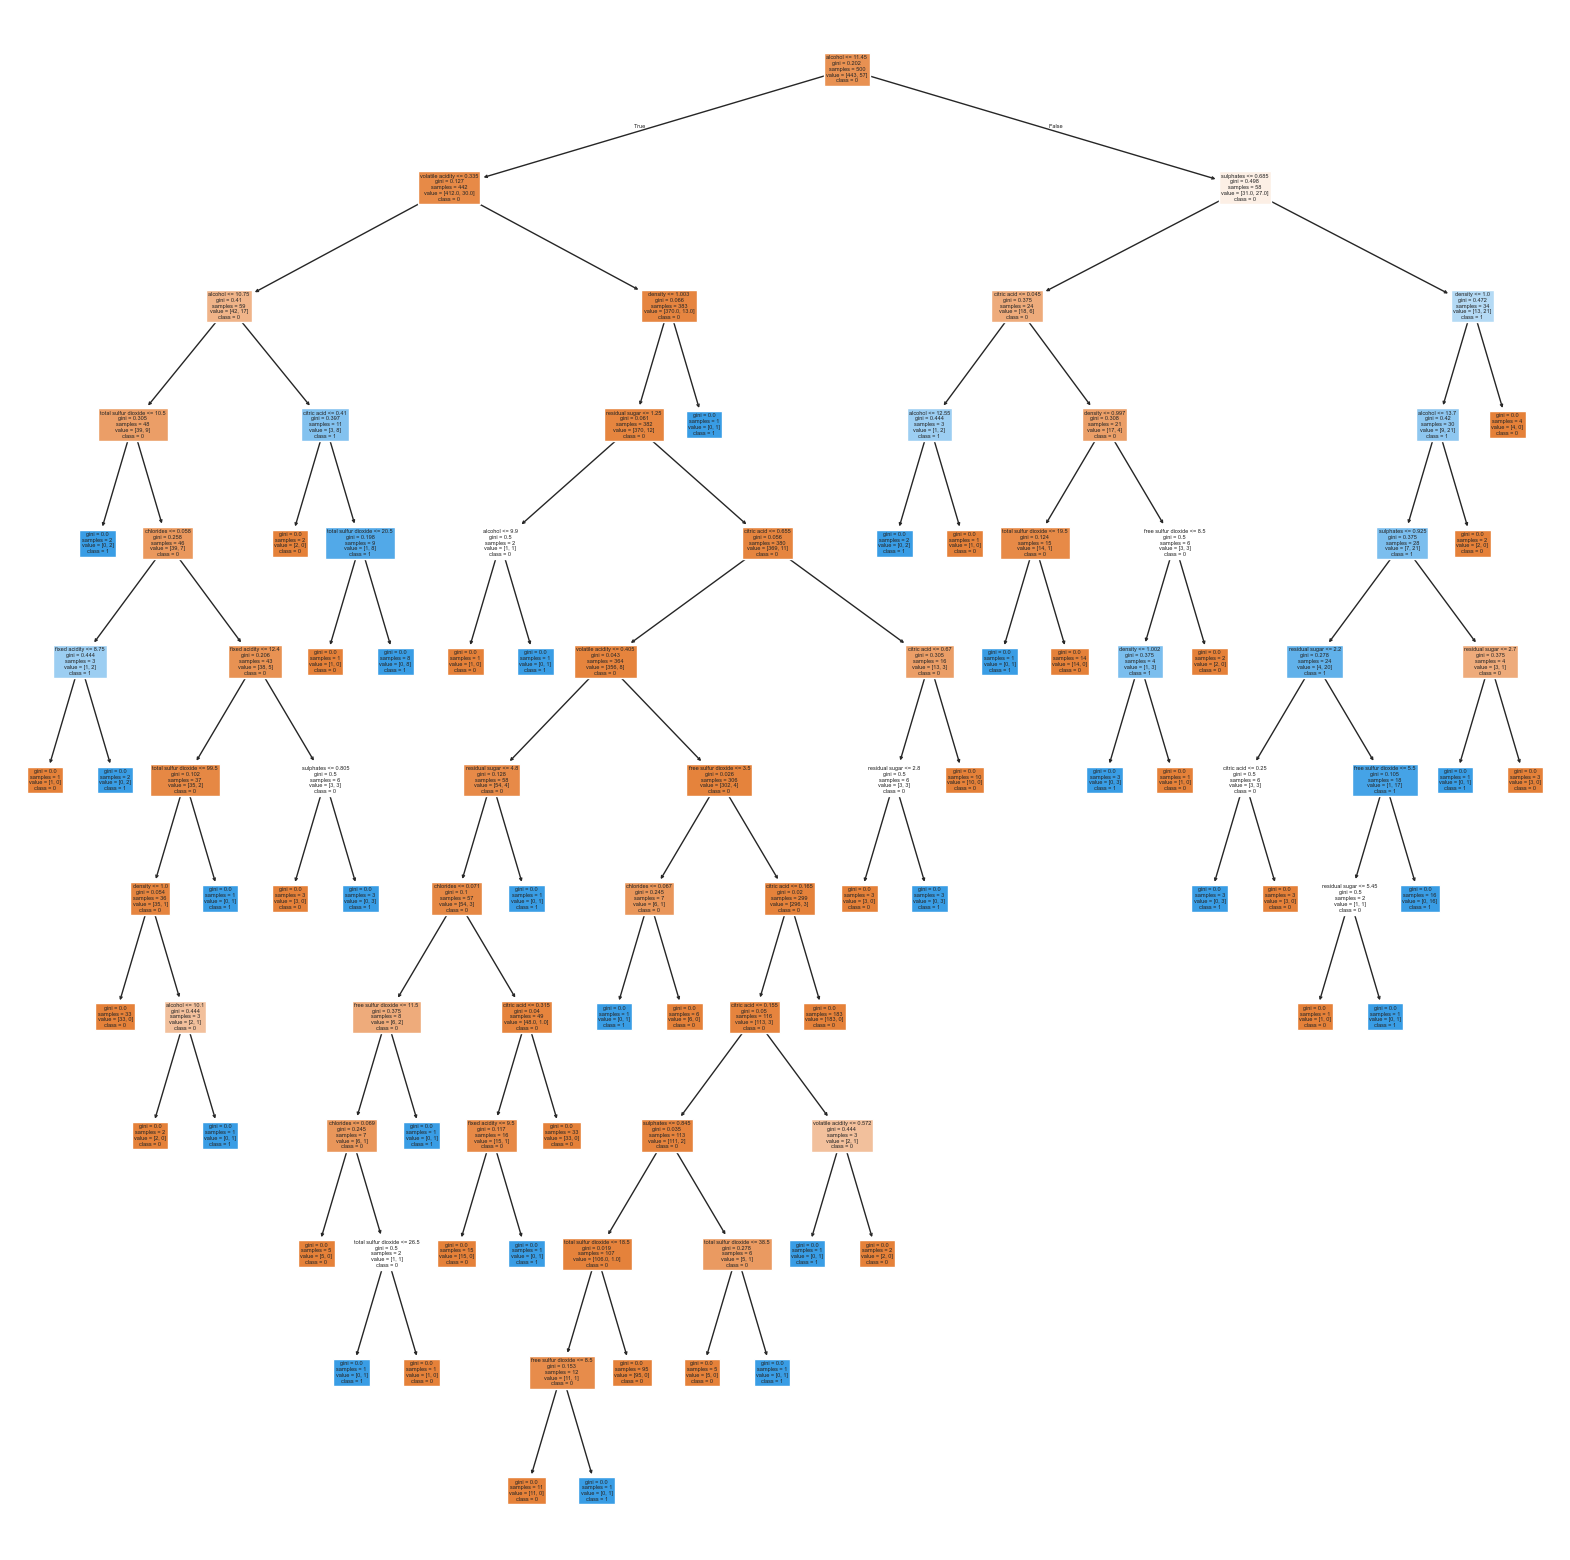

In [52]:
plt.figure(figsize=(20, 20))
tree.plot_tree(model1, filled=True, class_names=[str(i) for i in set(y1)], feature_names=list(x1.columns))
plt.savefig('model_1')

In [53]:
model1.predict(x1)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [54]:
model1.score(x1,y1)

1.0

In [55]:
model1.score(x_test,y_test)

0.8921568627450981

In [56]:
from pathlib import Path

In [57]:
Path

pathlib.Path

In [58]:
Path = model1.cost_complexity_pruning_path(x1,y1)
ccp_alpha = Path.ccp_alphas

In [59]:
ccp_alpha

array([0.        , 0.00130612, 0.00169709, 0.00171429, 0.00188889,
       0.00194444, 0.00195563, 0.002     , 0.00201074, 0.00206872,
       0.00266667, 0.00266667, 0.003     , 0.00329886, 0.00342857,
       0.00355556, 0.00367868, 0.00374284, 0.00396825, 0.00450163,
       0.00460556, 0.00517172, 0.00551087, 0.00691765, 0.00760649,
       0.01042951, 0.01321344, 0.03242866])

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [61]:
# Prepruning
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
          'min_samples_split' : [2,3,4],
          'min_samples_leaf': [1,2]}
clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator = clf, param_grid = params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [62]:
gcv.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [63]:
y_pred = gcv.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
accuracy_score(y_test,y_pred)

0.8725490196078431

In [66]:
confusion_matrix(y_test,y_pred)

array([[334,  15],
       [ 37,  22]], dtype=int64)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       349
           1       0.59      0.37      0.46        59

    accuracy                           0.87       408
   macro avg       0.75      0.66      0.69       408
weighted avg       0.86      0.87      0.86       408



# Classification Algorithms

In [68]:
# Logisitic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
regression = LogisticRegression()

In [71]:
regression.fit(x_train,y_train)

D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
import pickle
pickle.dump(regression,open('Logistic_Regression_Red_Wine_Quality.pickle','wb'))

In [73]:
%ls

 Volume in drive C is OS
 Volume Serial Number is E077-265C

 Directory of C:\Users\Jaimin Shah\Data Science

17-09-2024  07:45    <DIR>          .
11-09-2024  06:18    <DIR>          ..
16-09-2024  13:21    <DIR>          .ipynb_checkpoints
29-07-2024  09:24               689 admission_datalr_model
01-08-2024  10:58               525 admission_datalr_model.pickle
05-08-2024  09:01               461 advertising_model.pickle
06-09-2024  08:18            41,236 bi2.png
06-09-2024  08:18            20,905 bi3.png
17-09-2024  07:45         1,360,609 Decision Tree Binary Classification Exercise Dataset.ipynb
12-09-2024  07:31           533,387 Decision Tree IRIS Dataset.ipynb
16-09-2024  10:10         3,192,220 Decision Tree Red Wine Quality.ipynb
12-09-2024  07:31           671,991 Decision Tree Toy Dataset.ipynb
06-09-2024  13:22             1,205 diabetes_012_health_indicators_model.pickle
30-07-2024  09:47               605 heart_failure_clinical_model.pickle
30-07-2024  09:40          

In [74]:
model=pickle.load((open('Logistic_Regression_Red_Wine_Quality.pickle','rb')))

In [75]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Regression Score

In [76]:
regression.score(x_test,y_test)

0.8651960784313726

In [77]:
regression.score(x_train,y_train)

0.879074658254469

# Classification Score

In [78]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
x,y =load_iris(return_X_y= True)
clf = LogisticRegression(random_state=0).fit(x,y)
clf.predict(x[:2,:])
clf.predict_proba(x[:2,:])
clf.score(x,y)

D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       349
           1       0.59      0.37      0.46        59

    accuracy                           0.87       408
   macro avg       0.75      0.66      0.69       408
weighted avg       0.86      0.87      0.86       408



In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

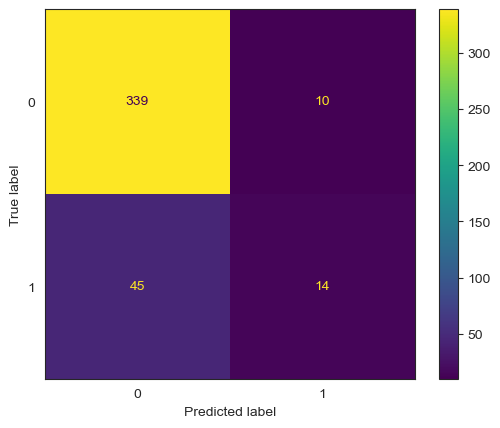

In [82]:
ConfusionMatrixDisplay.from_estimator(regression, x_test, y_test)

In [83]:
from sklearn.metrics import RocCurveDisplay

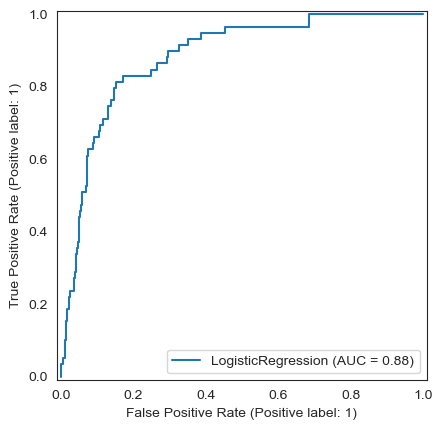

In [84]:
RocCurveDisplay.from_estimator(regression,x_test,y_test)

In [85]:
# Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [87]:
naive_bayes.score(x_test,y_test)

0.8529411764705882

In [88]:
naive_bayes.score(x_train,y_train)

0.8401682439537329

In [89]:
accuracy_score(y_test,y_pred)

0.8725490196078431

In [90]:
# K Nearest Neibhour (KNN)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [92]:
a_score=[]
for k in range(1,26,2):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  a_score.append(accuracy)

mse=[1 - x for x in a_score]

In [93]:
print (mse)

[0.18137254901960786, 0.14950980392156865, 0.14460784313725494, 0.14950980392156865, 0.13970588235294112, 0.13970588235294112, 0.13725490196078427, 0.13235294117647056, 0.13480392156862742, 0.13725490196078427, 0.13970588235294112, 0.1421568627450981, 0.14460784313725494]


In [94]:
max=a_score[0]
for j in a_score:
  if(j>max):
    max=j
print(max) 

0.8676470588235294


In [95]:
# Support Vector Classification

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)

In [100]:
scaler = StandardScaler()
scaled_x_test = scaler.fit_transform(x_test)

In [101]:
from sklearn.svm import SVC, LinearSVC
classifierSvm = LinearSVC(C=100,loss='hinge')

In [102]:
classifierSvm.fit(x,y)

D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100, loss='hinge')

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
import pickle

In [104]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=42)

In [105]:
x_train

array([[5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2

In [106]:
base_model = LinearSVC()

In [107]:
base_model.fit(scaled_x_train, y_train)

LinearSVC()

In [108]:
base_preds = base_model.predict(scaled_x_test)
base_preds

array([2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0,
       2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1,
       2])

In [109]:
scaled_x_test

array([[-0.4347023 ,  2.68805294, -1.45340968, -1.50036587],
       [-0.5617257 ,  2.01975248, -1.51499484, -1.19760145],
       [-1.06981929,  1.12868521, -1.33023937, -0.89483704],
       [ 1.72469548,  0.01485112,  1.25633718,  0.61898502],
       [ 1.47064869,  0.46038476,  0.57890047,  0.31622061],
       [ 0.58148489, -0.65344933,  0.70207078,  0.92174943],
       [ 0.45446149, -1.76728342,  0.45573015,  0.46760281],
       [-0.4347023 , -1.5445166 ,  0.14780437,  0.1648384 ],
       [ 0.58148489, -1.09898297,  0.76365593,  1.07313164],
       [-1.19684269,  0.01485112, -1.45340968, -1.50036587],
       [ 0.83553169,  0.01485112,  0.88682625,  1.22451385],
       [-0.8157725 ,  2.46528612, -1.39182453, -1.65174807],
       [-0.5617257 ,  0.90591839, -1.39182453, -1.19760145],
       [ 2.35981248, -0.43068251,  1.81060359,  1.22451385],
       [ 0.3274381 ,  0.01485112,  0.70207078,  0.92174943],
       [ 0.70850829, -0.2079157 ,  0.33255984,  0.1648384 ],
       [-0.3076789 ,  0.

In [110]:
regression= LinearSVC()

In [111]:
# x_train = pd.get_dummies(x_train)

In [112]:
regression.fit(x_train, y_train)

LinearSVC()

In [113]:
pickle.dump(regression, open('Red_Wine_Quality_SVC.pickle','wb'))

In [114]:
ls

 Volume in drive C is OS
 Volume Serial Number is E077-265C

 Directory of C:\Users\Jaimin Shah\Data Science

17-09-2024  07:45    <DIR>          .
11-09-2024  06:18    <DIR>          ..
16-09-2024  13:21    <DIR>          .ipynb_checkpoints
29-07-2024  09:24               689 admission_datalr_model
01-08-2024  10:58               525 admission_datalr_model.pickle
05-08-2024  09:01               461 advertising_model.pickle
06-09-2024  08:18            41,236 bi2.png
06-09-2024  08:18            20,905 bi3.png
17-09-2024  07:45         1,360,609 Decision Tree Binary Classification Exercise Dataset.ipynb
12-09-2024  07:31           533,387 Decision Tree IRIS Dataset.ipynb
16-09-2024  10:10         3,192,220 Decision Tree Red Wine Quality.ipynb
12-09-2024  07:31           671,991 Decision Tree Toy Dataset.ipynb
06-09-2024  13:22             1,205 diabetes_012_health_indicators_model.pickle
30-07-2024  09:47               605 heart_failure_clinical_model.pickle
30-07-2024  09:40          

In [115]:
model= pickle.load((open('Red_Wine_Quality_SVC.pickle','rb')))

In [116]:
model

LinearSVC()

# Regression

In [117]:
regression.score(x_train, y_train)

0.9619047619047619

In [118]:
# x_test = pd.get_dummies(x_test)
regression.score(x_test, y_test)

1.0

# Classification

In [119]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
x,y = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [120]:
print(clf.named_steps['linearsvc'].coef_)

[[0.14144338 0.52678408 0.67978708 0.49307555]]


In [121]:
print(clf.named_steps['linearsvc'].intercept_)

[0.16935932]
